In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.circuit import Parameter
import numpy as np

# Create a new circuit with two qubits
num_orbital = int(input("Orbital resigter number:"))
num_site = int(input('site register number:'))

qc = QuantumCircuit(num_orbital + num_site)
phi = Parameter('phi')
theta = Parameter('theta')

In [2]:
# A_n of orbital register in paper

def ansatz(circuit, n):
   circuit.cx(n-2,n-1)
   circuit.rz(-(phi+np.pi),n-2)
   circuit.ry(-(theta+np.pi),n-2)
   circuit.cx(n-1,n-2)
   circuit.ry((theta+np.pi),n-2)
   circuit.rz((phi+np.pi),n-2)
   circuit.cx(n-2,n-1)

In [3]:
from qiskit.circuit.library import QFT

qft_circuit = QFT(num_site)
qc.append(qft_circuit, [num_site + j +1 for j in range(num_site)])

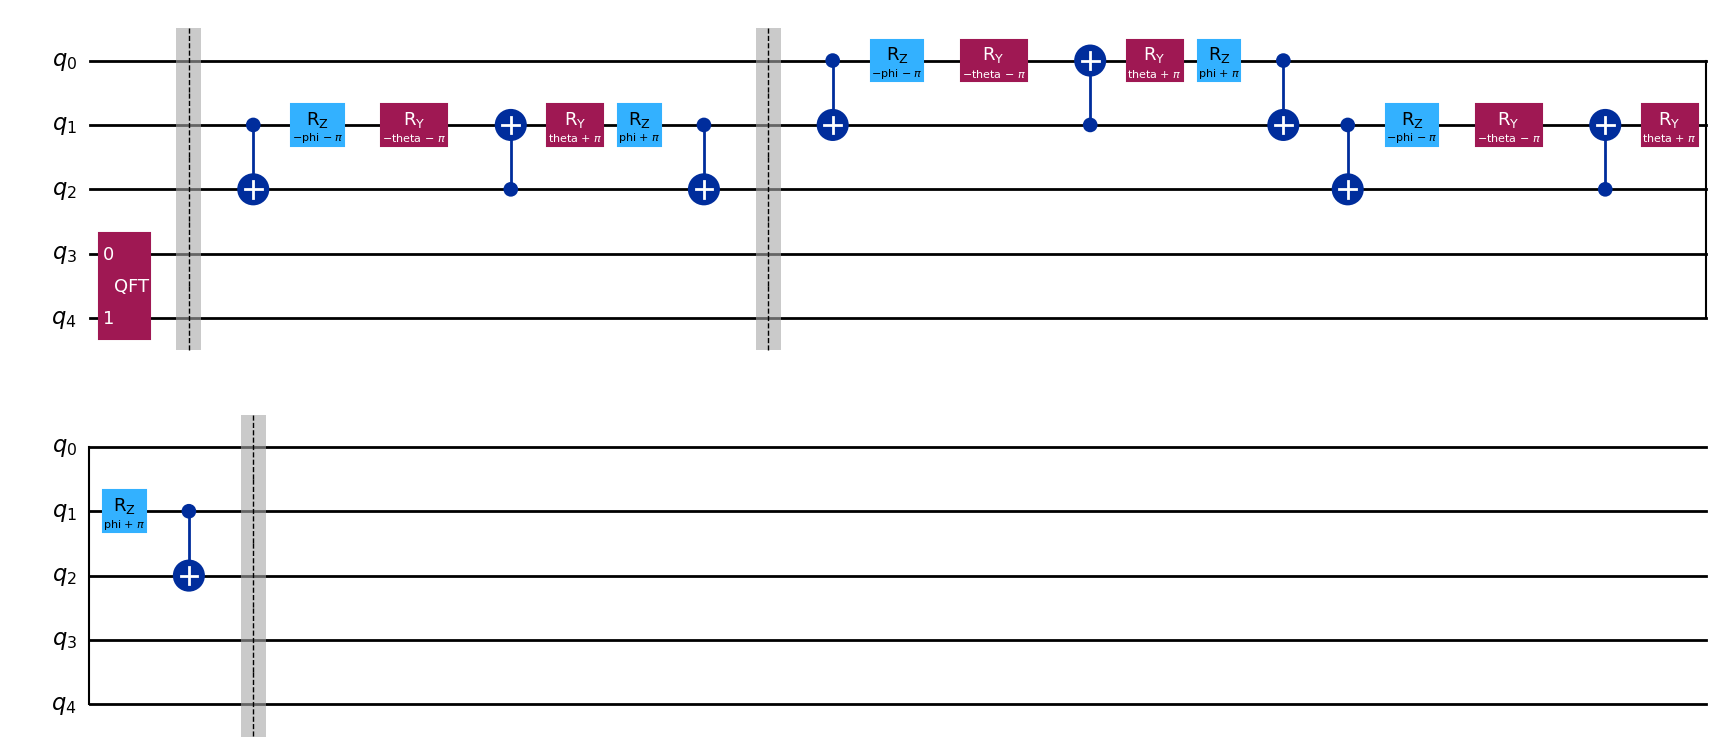

In [4]:
for i in range(num_orbital):
   test = num_orbital - i
   for x in range(num_orbital): 
    if x>=test:
       ansatz(qc, x+1)
    if x+1 == num_orbital:
       qc.barrier()


qc.draw('mpl')